# Previous Wrangling in Postgres

- Changed readmitted class to YES and NO
- Only included unique patient instances
- Reduced to 3 age groups
- Reduced to 5 medical specialties - (Cardiology, Surgery, Internal Medicine, Missing, Other)
- Reduced to 3 admission sources - (Referral, Emergency, Other)
- Reduced to 3 discharge types - (Discharge to home, Other, Hospice/Expired)
- Removed all Hospice/Expired instances


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 8)

In [2]:
diabetes = pd.read_csv('diabetes_processed.csv')
admissions = pd.read_csv('admissions_processed.csv')
discharges = pd.read_csv('discharges_processed.csv')

In [3]:
diabetes

,Unnamed: 0,discharge_id,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,time_in_hospital,...,insulin,glyburide_metformin,glipizide_metformin,glimepride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted,discharge_type
0,0,1,24437208,135,Caucasian,F,30-60,2,1,8,...,S,N,N,N,N,N,C,Y,YES,Discharged to home
1,1,1,56444490,13122,AfricanAmerican,M,30-60,3,1,3,...,N,N,N,N,N,N,N,N,NO,Discharged to home
2,2,25,5562150,13590,Caucasian,M,>=60,6,1,3,...,S,N,N,N,N,N,C,Y,NO,Other
3,3,1,26331546,13707,Caucasian,M,>=60,1,7,3,...,N,N,N,N,N,N,N,N,NO,Discharged to home
4,4,1,18726906,14481,Caucasian,M,>=60,2,1,2,...,S,N,N,N,N,N,C,Y,NO,Discharged to home
5,5,1,17833668,15642,Caucasian,F,30-60,1,7,1,...,S,N,N,N,N,N,N,Y,NO,Discharged to home
6,6,1,14807538,16623,AfricanAmerican,F,30-60,1,7,4,...,N,N,N,N,N,N,C,Y,NO,Discharged to home
7,7,25,2952726,25434,Caucasian,M,>=60,6,7,10,...,S,N,N,N,N,N,N,Y,NO,Other
8,8,1,32552598,27333,Caucasian,M,>=60,2,1,3,...,D,N,N,N,N,N,C,Y,NO,Discharged to home
9,9,1,11195616,27486,Caucasian,M,>=60,1,7,9,...,S,N,N,N,N,N,C,Y,NO,Discharged to home


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69536 entries, 0 to 69535
Data columns (total 50 columns):
Unnamed: 0                 69536 non-null int64
discharge_id               69536 non-null int64
encounter_id               69536 non-null int64
patient_nbr                69536 non-null int64
race                       69536 non-null object
gender                     69536 non-null object
age                        69536 non-null object
admission_type_id          69536 non-null int64
admission_source_id        69536 non-null int64
time_in_hospital           69536 non-null int64
medical_specialty          69536 non-null object
num_lab_procedures         69536 non-null int64
num_procedures             69536 non-null int64
num_medications            69536 non-null int64
number_out                 69536 non-null int64
number_emergency           69536 non-null int64
number_inpatient           69536 non-null int64
diag_1                     69536 non-null object
diag_2                

In [5]:
admissions

,Unnamed: 0,admission_source_id,admission_source
0,0,1,Referral
1,1,2,Referral
2,2,3,Referral
3,3,7,Emergency
4,4,4,Other
5,5,5,Other
6,6,6,Other
7,7,8,Other
8,8,9,Other
9,9,10,Other


In [6]:
discharges

,Unnamed: 0,discharge_id,discharge_type
0,0,1,Discharged to home
1,1,11,Hospice/Expired
2,2,13,Hospice/Expired
3,3,14,Hospice/Expired
4,4,19,Hospice/Expired
5,5,20,Hospice/Expired
6,6,21,Hospice/Expired
7,7,2,Other
8,8,3,Other
9,9,4,Other


# Additional Data Processing

1. Remove irrelevant features - features that have No/N making up about 90% of the feature
2. Update Primary Diagnosis column
3. Merge Admission Sources

## Removing Irrelevant Features

In [7]:
# Replace all N values with nulls then set drop null function threshold to 60000 - a little over 90% of the column

diabetes.replace(to_replace='N', inplace=True, value=np.nan)
diabetes.drop('max_glu_serum', axis=1, inplace=True)
diabetes.dropna(axis=1, thresh=60000, inplace=True)

In [8]:
# reduced dimensionality to 24 features

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69536 entries, 0 to 69535
Data columns (total 24 columns):
Unnamed: 0             69536 non-null int64
discharge_id           69536 non-null int64
encounter_id           69536 non-null int64
patient_nbr            69536 non-null int64
race                   69536 non-null object
gender                 69536 non-null object
age                    69536 non-null object
admission_type_id      69536 non-null int64
admission_source_id    69536 non-null int64
time_in_hospital       69536 non-null int64
medical_specialty      69536 non-null object
num_lab_procedures     69536 non-null int64
num_procedures         69536 non-null int64
num_medications        69536 non-null int64
number_out             69536 non-null int64
number_emergency       69536 non-null int64
number_inpatient       69536 non-null int64
diag_1                 69536 non-null object
diag_2                 69536 non-null object
diag_3                 69536 non-null object
numb

## Update Primary Diagnosis Column

Code dictionary from the study:

 - “circulatory” for icd9: 390–459, 785 
 - “digestive” for icd9: 520–579, 787
 - “genitourinary” for icd9: 580–629, 788
 - “diabetes” for icd9: 250.xx
 - “injury” for icd9: 800–999
 - “musculoskeletal” for icd9: 710–739
 - “neoplasms” for icd9: 140–239
 - “respiratory’’ for icd9: 460–519, 786
 - “other” for otherwise

1. Create dictionary mapping codes to diagnosis
2. Clean columns to make all values are numerical
3. Replace values with dictionary keys
4. Replace remaining unchanged values with 'Other'

In [9]:
diag_dict = {785: 'circulatory', 786: 'respiratory', 787: 'digestive', 788: 'genitourinary'}

for i in range(140,240):
    diag_dict[i] = 'neoplasms'
for i in range(390,460):
    diag_dict[i] = 'circulatory'
for i in range(460,520):
    diag_dict[i] = 'respiratory'
for i in range(520,580):
    diag_dict[i] = 'digestive'
for i in range(580,630):
    diag_dict[i] = 'genitourinary'
for i in range(710,740):
    diag_dict[i] = 'musculoskeletal'
for i in range(800,1000):
    diag_dict[i] = 'injury'
for i in range(2500, 25100):
    diag_dict[i] = 'diabetes'

In [10]:
diabetes['diag_1'].value_counts()

414      5014
428      3918
786      2970
410      2640
486      2292
427      2029
715      1809
682      1434
780      1422
434      1393
491      1347
996      1212
276      1161
250.8    1060
599      1015
38       1010
584       935
V57       838
820       772
574       743
435       727
562       701
493       683
577       679
296       652
722       650
250.6     639
433       593
518       592
440       590
         ... 
V43         1
75          1
84          1
944         1
973         1
803         1
903         1
314         1
58          1
208         1
634         1
61          1
791         1
523         1
V66         1
955         1
347         1
610         1
V07         1
870         1
V70         1
671         1
911         1
982         1
994         1
583         1
389         1
147         1
640         1
57          1
Name: diag_1, Length: 693, dtype: int64

In [11]:
# Remove letters and decimals

diabetes['diag_1'].replace(regex=True, inplace=True, to_replace='[a-zA-Z,\.]',value='')
diabetes['diag_1'].replace(to_replace='?', inplace=True, value=0)

# Convert to integer
diabetes['diag_1'] = diabetes['diag_1'].astype(int)

# Replace values from dictionary - Not the most efficient way O(N) but will suffice for dataset of this size
diabetes['diag_1'].replace(diag_dict, inplace=True)

# Convert back to string and replace last values with 'Other'
diabetes['diag_1'] = diabetes['diag_1'].astype(str)
diabetes['diag_1'].replace(regex=True, inplace=True, to_replace='^[0-9]+$', value='Other')

In [12]:
diabetes['diag_1']

0            circulatory
1                 injury
2            circulatory
3            circulatory
4            circulatory
5          genitourinary
6              digestive
7            circulatory
8            circulatory
9            circulatory
10           circulatory
11           circulatory
12           circulatory
13           respiratory
14           circulatory
15           circulatory
16                 Other
17           respiratory
18           circulatory
19                 Other
20             digestive
21           circulatory
22           circulatory
23           circulatory
24           respiratory
25           circulatory
26           circulatory
27           respiratory
28           circulatory
29           circulatory
              ...       
69506              Other
69507    musculoskeletal
69508              Other
69509             injury
69510           diabetes
69511        circulatory
69512        circulatory
69513           diabetes
69514           diabetes


In [13]:
diabetes['diag_1'].value_counts()

circulatory        20931
Other              12585
respiratory         9430
digestive           6477
diabetes            5426
injury              4797
musculoskeletal     3949
genitourinary       3489
neoplasms           2452
Name: diag_1, dtype: int64

In [14]:
diabetes = diabetes.merge(admissions, on='admission_source_id', how='left')
diabetes.head()

,Unnamed: 0_x,discharge_id,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,time_in_hospital,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,a1cresult,readmitted,discharge_type,Unnamed: 0_y,admission_source
0,0,1,24437208,135,Caucasian,F,30-60,2,1,8,...,0,circulatory,997,560,8,None,YES,Discharged to home,0,Referral
1,1,1,56444490,13122,AfricanAmerican,M,30-60,3,1,3,...,0,injury,V42,250.01,9,None,NO,Discharged to home,0,Referral
2,2,25,5562150,13590,Caucasian,M,>=60,6,1,3,...,0,circulatory,411,428,8,None,NO,Other,0,Referral
3,3,1,26331546,13707,Caucasian,M,>=60,1,7,3,...,0,circulatory,571,403,8,None,NO,Discharged to home,3,Emergency
4,4,1,18726906,14481,Caucasian,M,>=60,2,1,2,...,0,circulatory,413,427,8,None,NO,Discharged to home,0,Referral


# Exploratory Analysis: Plots

1. Demographics - Race, Gender, Age
2. Admission Sources
3. Discharge Types
4. Medical Specialty
5. Primary Diagnosis
6. H1AC results
7. Continuous variables - Number of lab procedures, time in hospital, etc.

## Age and Race Breakdown 

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


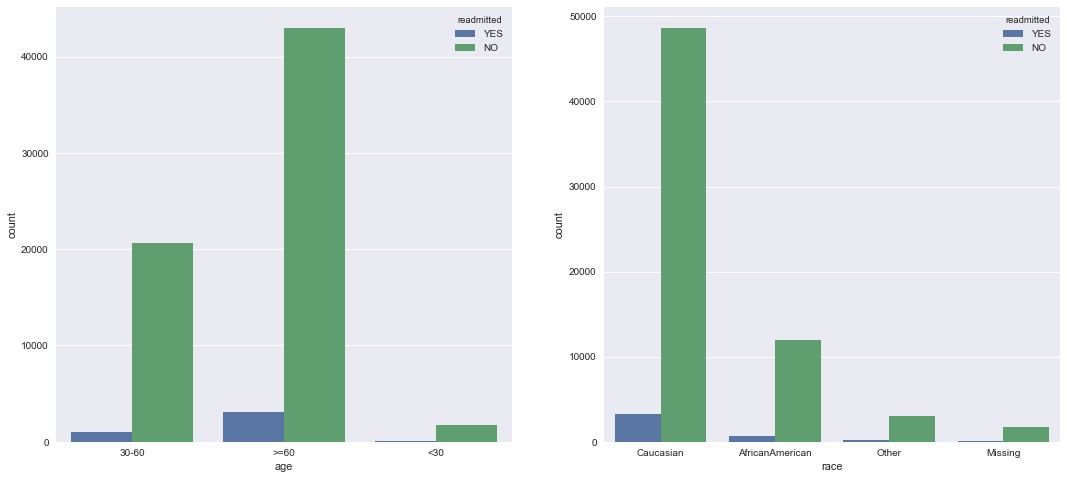

In [15]:
fig, ax = plt.subplots(1,2)
sb.countplot(x='age', hue='readmitted', data=diabetes, ax=ax[0])
sb.countplot(x='race', hue='readmitted', data=diabetes, ax=ax[1])
fig.show()

## Gender and Medical Specialty Breakdown

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


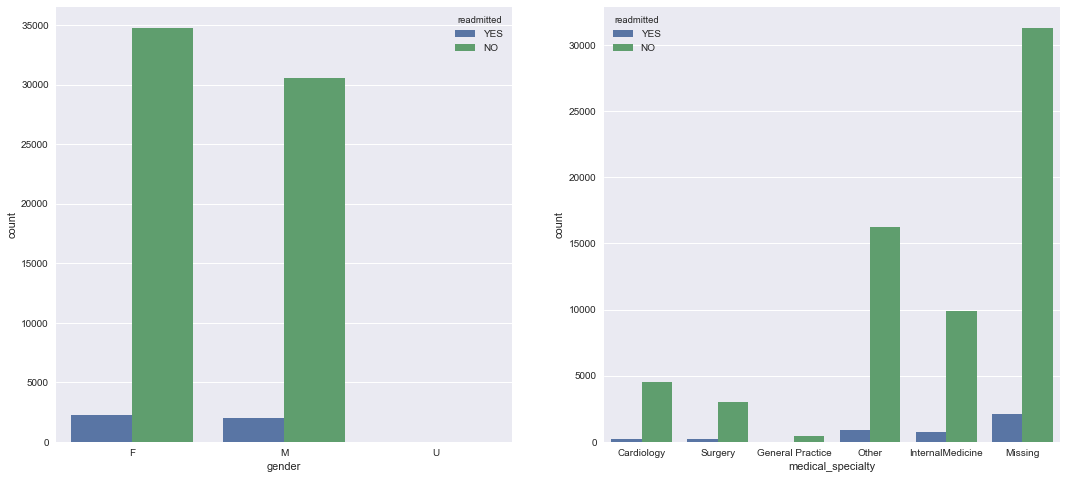

In [17]:
fig, ax = plt.subplots(1,2)
sb.countplot(x='gender', hue='readmitted', data=diabetes, ax=ax[0])
sb.countplot(x='medical_specialty', hue='readmitted', data=diabetes, ax=ax[1])
fig.show()

## Discharge Type and Admission Source Breakdown

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


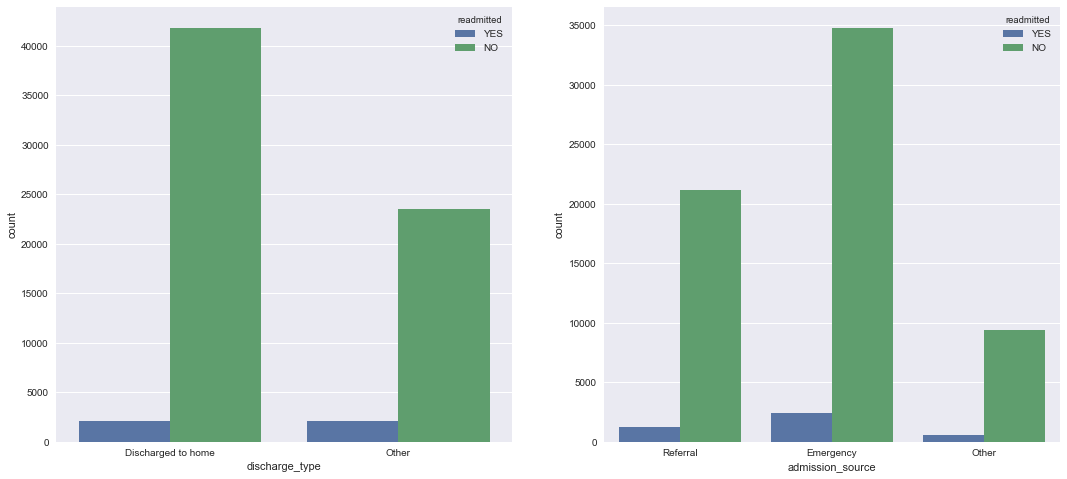

In [18]:
fig, ax = plt.subplots(1,2)
sb.countplot(x='discharge_type', hue='readmitted', data=diabetes, ax=ax[0])
sb.countplot(x='admission_source', hue='readmitted', data=diabetes, ax=ax[1])
fig.show()

## Primary Diagnosis and A1c Test Result Breakdown

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


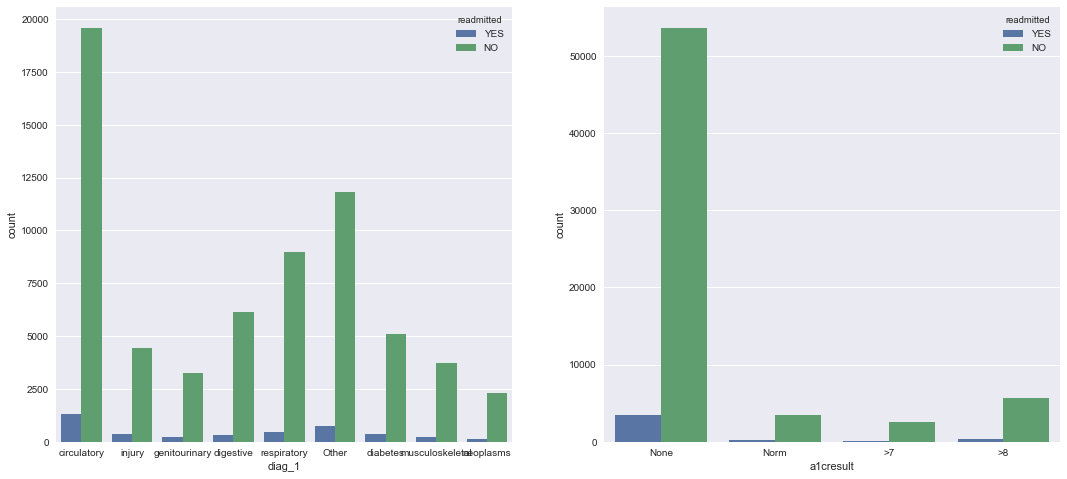

In [19]:
fig, ax = plt.subplots(1,2)
sb.countplot(x='diag_1', hue='readmitted', data=diabetes, ax=ax[0])
sb.countplot(x='a1cresult', hue='readmitted', data=diabetes, ax=ax[1])
fig.show()

## Continuous Feature Distributions

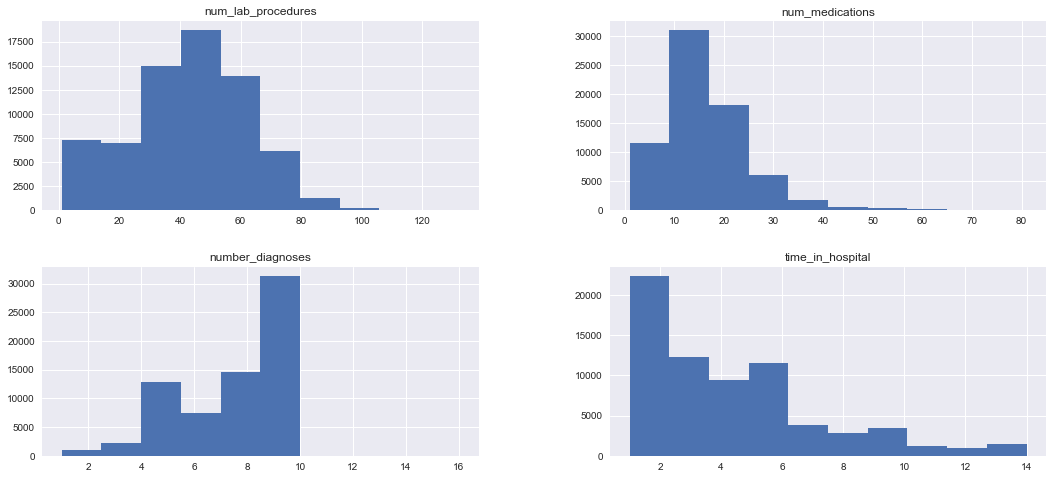

In [20]:
numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']

diabetes[numerical_columns].hist(sharex=False, sharey=False)
plt.show()

# Predictive Models - Dataframe Preparation